In [1]:
from resources.helper.helper_dataset import get_dataloaders_mnist
from resources.helper.helper_evaluation import set_all_seeds, set_deterministic
from resources.helper.helper_train import train_model
from resources.helper.helper_plotting import plot_training_loss, plot_accuracy, show_examples

import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
train_loader, valid_loader, test_loader = get_dataloaders_mnist(batch_size=256,validation_fraction=0.1)
for images, labels in train_loader:  
    print('Image batch d    imensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch d    imensions: torch.Size([256, 1, 28, 28])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([8, 1, 6, 4, 5, 5, 4, 4, 3, 1])


In [4]:
class MLP(torch.nn.Module):

    def __init__(self, num_features, num_classes, drop_proba, 
                 num_hidden_1, num_hidden_2):
        super().__init__()
        
        self.network = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Flatten(),
            torch.nn.Linear(num_features, num_hidden_1),
            torch.nn.ReLU(),
            torch.nn.Dropout(drop_proba),
            # 2nd hidden layer
            torch.nn.Linear(num_hidden_1, num_hidden_2),
            torch.nn.ReLU(),
            torch.nn.Dropout(drop_proba),
            # output layer
            torch.nn.Linear(num_hidden_2, num_classes)
        )
           
    def forward(self, x):
        logits = self.network(x)
        return logits

Epoch: 001/020 | Batch 0000/0210 | Loss: 2.3105
Epoch: 001/020 | Batch 0050/0210 | Loss: 1.9577
Epoch: 001/020 | Batch 0100/0210 | Loss: 0.8783
Epoch: 001/020 | Batch 0150/0210 | Loss: 0.5532
Epoch: 001/020 | Batch 0200/0210 | Loss: 0.5348
Epoch: 001/020 | Train: 86.89% | Validation: 89.30%
Time elapsed: 0.30 min
Epoch: 002/020 | Batch 0000/0210 | Loss: 0.4331
Epoch: 002/020 | Batch 0050/0210 | Loss: 0.4219
Epoch: 002/020 | Batch 0100/0210 | Loss: 0.4394
Epoch: 002/020 | Batch 0150/0210 | Loss: 0.4812
Epoch: 002/020 | Batch 0200/0210 | Loss: 0.4161
Epoch: 002/020 | Train: 90.37% | Validation: 92.07%
Time elapsed: 0.65 min
Epoch: 003/020 | Batch 0000/0210 | Loss: 0.3165
Epoch: 003/020 | Batch 0050/0210 | Loss: 0.3260
Epoch: 003/020 | Batch 0100/0210 | Loss: 0.3426
Epoch: 003/020 | Batch 0150/0210 | Loss: 0.2620
Epoch: 003/020 | Batch 0200/0210 | Loss: 0.2951
Epoch: 003/020 | Train: 91.24% | Validation: 93.00%
Time elapsed: 0.96 min
Epoch: 004/020 | Batch 0000/0210 | Loss: 0.2390
Epoch: 

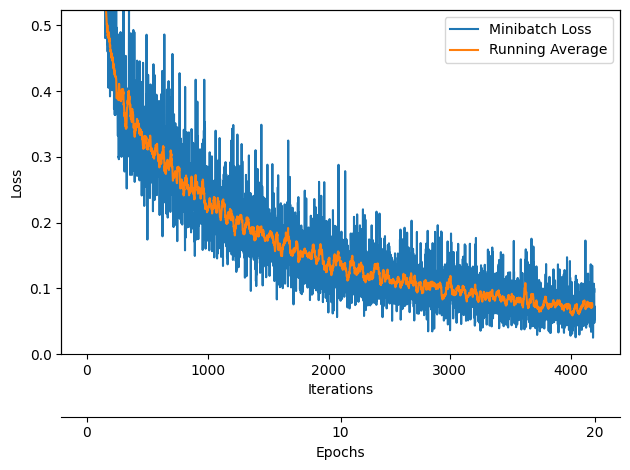

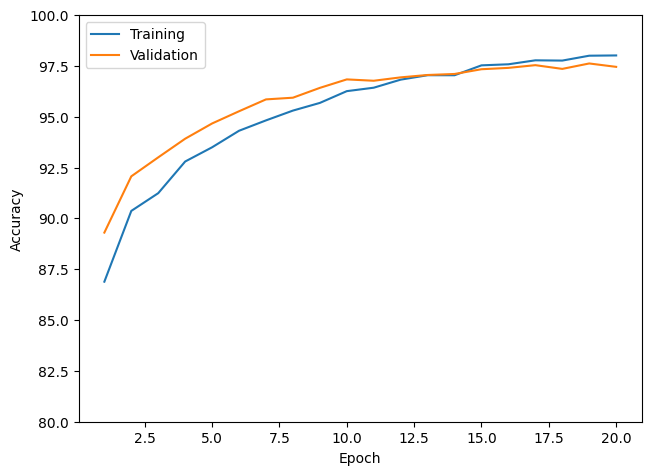

In [9]:
torch.manual_seed(42)
model = MLP(num_features=28*28,
                             num_hidden_1=70,
                             num_hidden_2=50,
                             drop_proba=0.0,
                             num_classes=10)
model = model.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=20,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=device)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=20,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)

plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)

plt.ylim([80, 100])
plt.show()


Epoch: 001/020 | Batch 0000/0210 | Loss: 2.3124
Epoch: 001/020 | Batch 0050/0210 | Loss: 2.0674
Epoch: 001/020 | Batch 0100/0210 | Loss: 1.3364
Epoch: 001/020 | Batch 0150/0210 | Loss: 0.9981
Epoch: 001/020 | Batch 0200/0210 | Loss: 0.8998
Epoch: 001/020 | Train: 85.00% | Validation: 88.07%
Time elapsed: 0.45 min
Epoch: 002/020 | Batch 0000/0210 | Loss: 0.8836
Epoch: 002/020 | Batch 0050/0210 | Loss: 0.7180
Epoch: 002/020 | Batch 0100/0210 | Loss: 0.7211
Epoch: 002/020 | Batch 0150/0210 | Loss: 0.7066
Epoch: 002/020 | Batch 0200/0210 | Loss: 0.6796
Epoch: 002/020 | Train: 89.46% | Validation: 91.63%
Time elapsed: 0.87 min
Epoch: 003/020 | Batch 0000/0210 | Loss: 0.6219
Epoch: 003/020 | Batch 0050/0210 | Loss: 0.5610
Epoch: 003/020 | Batch 0100/0210 | Loss: 0.5712
Epoch: 003/020 | Batch 0150/0210 | Loss: 0.5243
Epoch: 003/020 | Batch 0200/0210 | Loss: 0.5188
Epoch: 003/020 | Train: 91.01% | Validation: 92.98%
Time elapsed: 1.16 min
Epoch: 004/020 | Batch 0000/0210 | Loss: 0.3936
Epoch: 

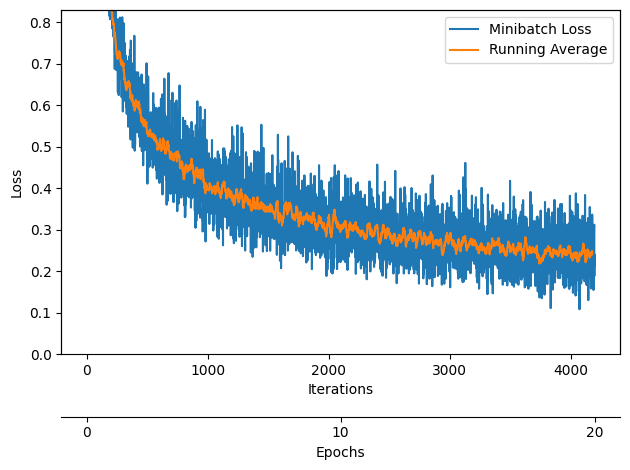

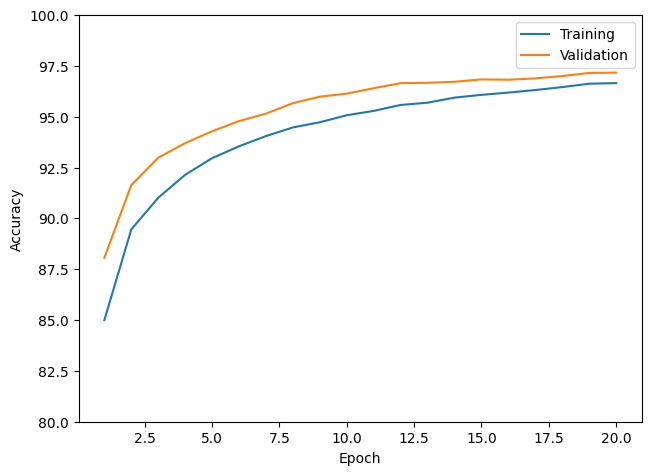

In [10]:
torch.manual_seed(42)
model = MLP(num_features=28*28,
                             num_hidden_1=70,
                             num_hidden_2=50,
                             drop_proba=0.4,
                             num_classes=10)
model = model.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=20,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=device)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=20,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)

plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)

plt.ylim([80, 100])
plt.show()
